ref : <https://github.com/codebasics/py/blob/master/ML/9_decision_tree/9_decision_tree.ipynb>

# Import Libraries

In [162]:
#Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as mn

# Load Data 

In [163]:
#Load the data
titanic = pd.read_csv("D:/NF/ML/Decision Tree/titanic.csv")

#Print the first 10 rows of data
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [164]:
titanic.shape

(891, 12)

In [165]:
# Remove unrelated variables

col_to_drop = ['Name', 'Ticket', 'Cabin']
titanic = titanic.drop(col_to_drop, axis=1)
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [166]:
# Get descriptive statistics

titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


There is missing data in variable `age` as it is less than 891 which is the total number of passengers

In [167]:
# Get Count of number of the survivors
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

## Handling Missing Value

In [168]:
# Check missing value

titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

<Axes: >

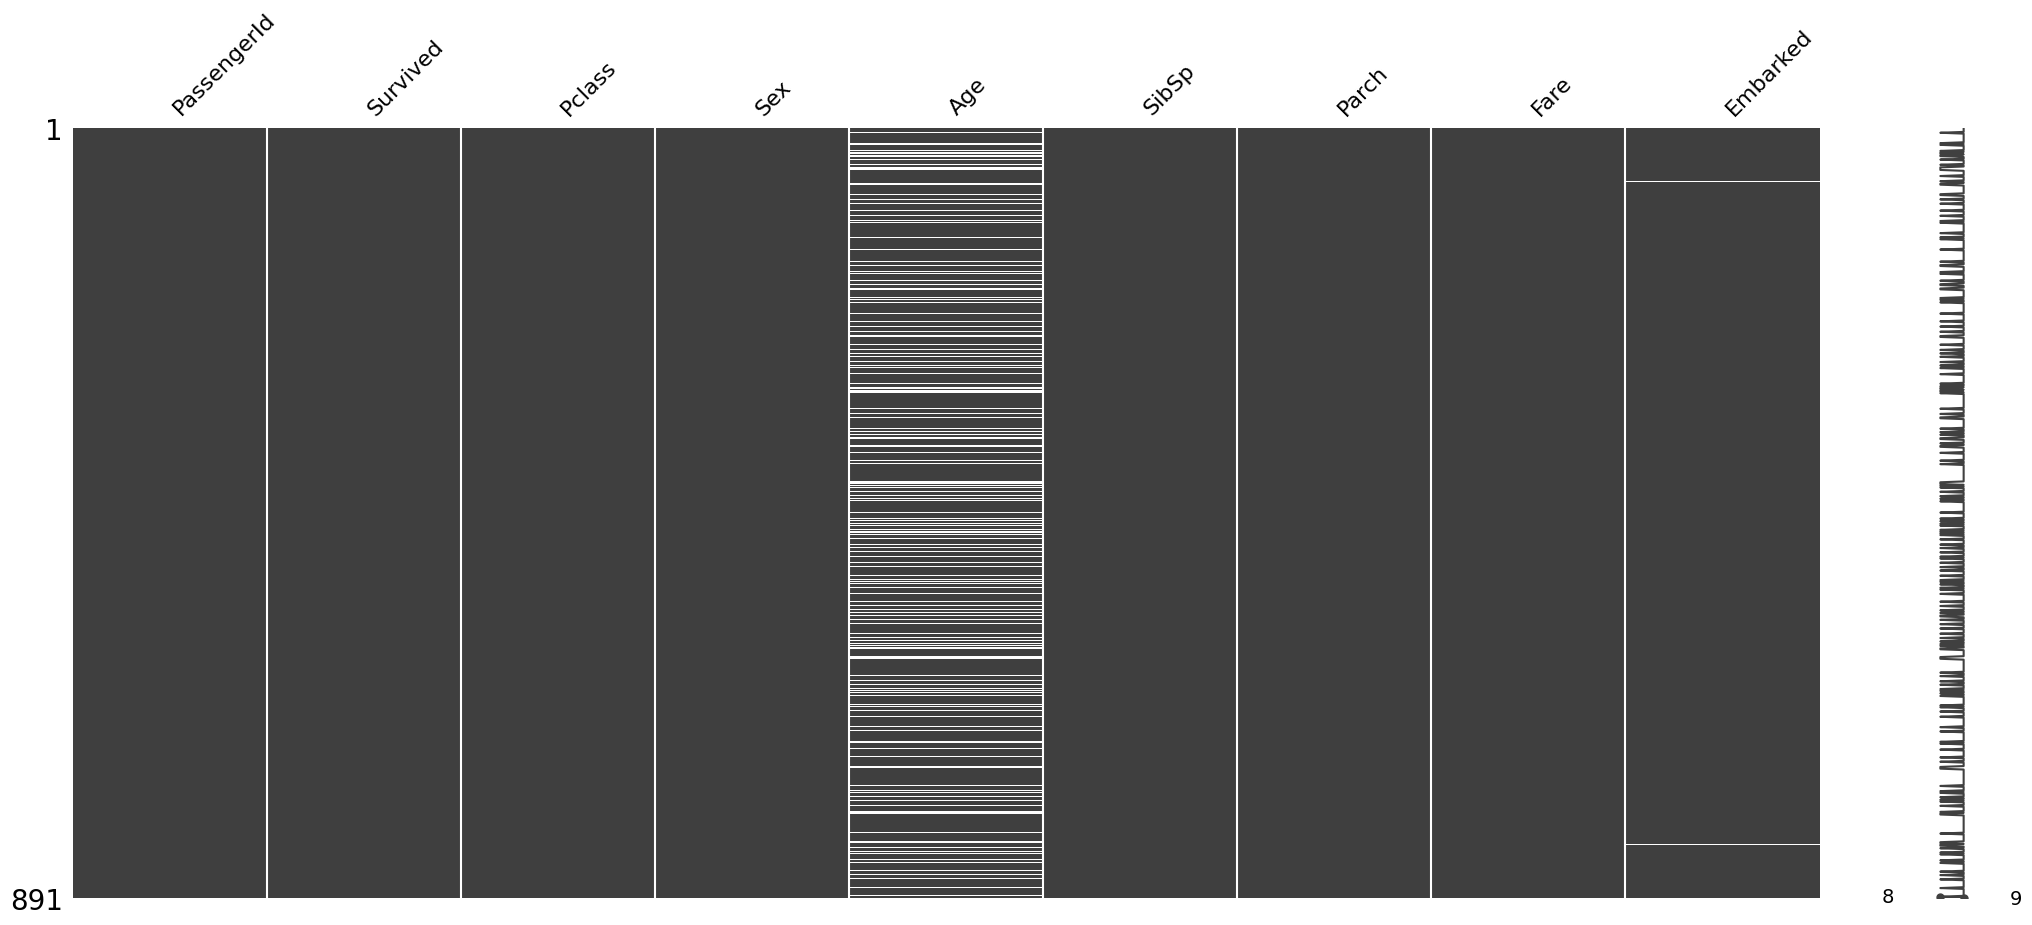

In [169]:
mn.matrix(titanic)

### Handling missing in AGE
* Replace with Mean

In [170]:
# Substitue the missing value with mean

#calculate mean of AGE
age_mean = titanic['Age'].mean()

# fill missing values in age with mean
titanic['Age'].fillna(age_mean, inplace=True)

titanic['Age'].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

### Handling Missing in Embarked
* Replace with mode

In [171]:
# check the value in embarked

titanic['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [172]:
titanic['Embarked']= titanic['Embarked'].fillna(titanic['Embarked'].value_counts().index[0])
titanic['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [173]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Exploratory Data Analysis (EDA)

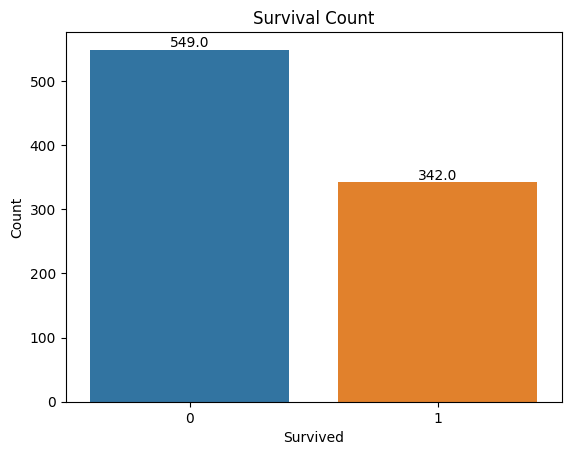

In [174]:
# Visualize the count number of survivors
ax = sns.countplot(x='Survived', data=titanic, label="Count")

# Add count numbers on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

#set labels and title
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival Count')
plt.show()

# Feature Engineering

In [175]:
inputs = titanic.drop('Survived', axis='columns')
inputs.head(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,male,22.000000,1,0,7.2500,S
1,2,1,female,38.000000,1,0,71.2833,C
2,3,3,female,26.000000,0,0,7.9250,S
3,4,1,female,35.000000,1,0,53.1000,S
4,5,3,male,35.000000,0,0,8.0500,S
5,6,3,male,29.699118,0,0,8.4583,Q
6,7,1,male,54.000000,0,0,51.8625,S
7,8,3,male,2.000000,3,1,21.0750,S
8,9,3,female,27.000000,0,2,11.1333,S
9,10,2,female,14.000000,1,0,30.0708,C


In [183]:
y = titanic['Survived']

In [177]:
from sklearn.preprocessing import LabelEncoder

# set dummy for the categorical variables
le_Sex = LabelEncoder()
le_Embarked = LabelEncoder()

In [181]:
# check the input of dummy

inputs['le_Sex'] = le_Sex.fit_transform(inputs['Sex'])
inputs['le_Embarked'] = le_Embarked.fit_transform(inputs['Embarked'])

inputs.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,le_Sex,le_Embarked
0,1,3,male,22.0,1,0,7.2500,S,1,2
1,2,1,female,38.0,1,0,71.2833,C,0,0
2,3,3,female,26.0,0,0,7.9250,S,0,2
3,4,1,female,35.0,1,0,53.1000,S,0,2
4,5,3,male,35.0,0,0,8.0500,S,1,2


In [182]:
X = inputs.drop(['Sex', 'Embarked'], axis='columns')
X.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,le_Sex,le_Embarked
0,1,3,22.0,1,0,7.2500,1,2
1,2,1,38.0,1,0,71.2833,0,0
2,3,3,26.0,0,0,7.9250,0,2
3,4,1,35.0,1,0,53.1000,0,2
4,5,3,35.0,0,0,8.0500,1,2


# Modeling Decision Tree

In [188]:
# Split data into training and testing

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size= 0.7, random_state=42)

In [184]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [189]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [190]:
y_pred= model.predict(X_test)
y_pred

array([0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0], dtype=int64)

In [192]:
# Check Significance variables

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame to display the importances
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
feature_importances


,Feature,Importance
6,le_Sex,0.283660
0,PassengerId,0.214583
5,Fare,0.164850
2,Age,0.151204
1,Pclass,0.099742
3,SibSp,0.039209
4,Parch,0.029001
7,le_Embarked,0.017751


# Model Evaluation

## Classification Table

In [193]:
from sklearn.metrics import confusion_matrix

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a classification table
classification_table = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
print(classification_table)

                 Predicted Negative  Predicted Positive
Actual Negative                 124                  33
Actual Positive                  38                  73


In [194]:
model.score(X_test,y_test)

0.7350746268656716